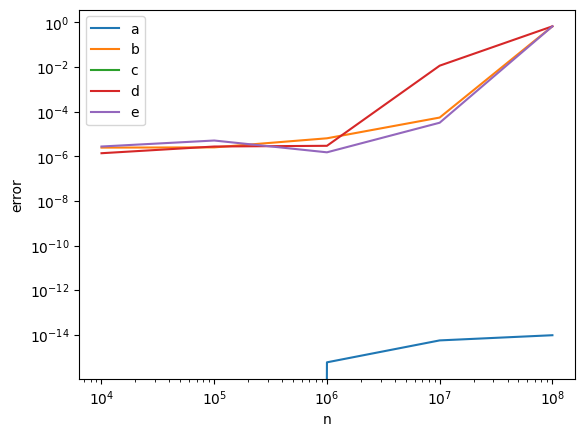

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import uniform
from math import fsum

def generate_numbers(n: int) -> list[float]:
    return np.array([np.float32(uniform(0, 1)) for _ in range(n)])

def sum_a(numbers: list[float]) -> float:
    result = np.float64(0)
    for num in numbers:
        result += num
    return result

def sum_b(numbers: list[float]) -> float:
    result = np.float32(0)
    for num in numbers:
        result += num
    return result

def sum_c(numbers: list[float]) -> float:
    result = np.float32(0)
    err = np.float32(0)
    for num in numbers:
        y = num - err
        temp = result + y
        err = (temp - result) - y
        result = temp
    
    return result

def sum_d(numbers: list[float]) -> float:
    numbers_s = sorted(numbers)
    result = np.float32(0)
    for num in numbers_s:
        result += num
    return result

def sum_e(numbers: list[float]) -> float:
    numbers_s = sorted(numbers, reverse=True)
    result = np.float32(0)
    for num in numbers_s:
        result += num
    return result

error_a = []
error_b = []
error_c = []
error_d = []
error_e = []

for k in range(4, 9):
    n = 10**k
    numbers = generate_numbers(n)
    result = fsum(numbers)
    error_a.append(abs(sum_a(numbers) - result)/result)
    error_b.append(abs(sum_b(numbers) - result)/result)
    error_c.append(abs(sum_c(numbers) - result)/result)
    error_d.append(abs(sum_d(numbers) - result)/result)
    error_e.append(abs(sum_e(numbers) - result)/result)

x = [10**k for k in range(4, 9)]

plt.plot(x, error_a, x, error_b, x, error_c, x, error_d, x, error_e)
plt.legend(["a", "b", "c", "d", "e"])
plt.xlabel("n")
plt.ylabel("error")
plt.xscale("log")
plt.yscale("log")
plt.show()
    
